In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [281]:
folder = '../data/raw_data/'

df_categories = pd.read_csv(f'{folder}df_categories_ai.csv')
df_comments = pd.read_csv(f'{folder}df_comments_video_ai.csv', engine='python', on_bad_lines='skip')
df_transcript = pd.read_csv(f'{folder}df_transcript_original_ai.csv')
df_videos = pd.read_csv(f'{folder}df_video_ai.csv')
df_search = pd.read_csv(f'{folder}df_video_search_ids_ai.csv')
df_channel = pd.read_csv(f'{folder}df_channel_data_ai.csv')

# Clean df_channel_data

In [282]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_id        2010 non-null   object
 1   title             2010 non-null   object
 2   description       1857 non-null   object
 3   published_at      2010 non-null   object
 4   subscriber_count  2010 non-null   int64 
 5   video_count       2010 non-null   int64 
 6   view_count        2010 non-null   int64 
 7   region            1583 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.8+ KB


In [283]:
# Drop wrong fetch data 
df_channel.dropna(subset=['view_count'], inplace=True)

# Change to datetime
df_channel['published_at'] = pd.to_datetime(df_channel['published_at'], format='mixed')

# Export cleaned data
df_channel.to_csv('../data/clean_data/df_channel_data.csv', index=False)

# Show info cleaned
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   channel_id        2010 non-null   object             
 1   title             2010 non-null   object             
 2   description       1857 non-null   object             
 3   published_at      2010 non-null   datetime64[ns, UTC]
 4   subscriber_count  2010 non-null   int64              
 5   video_count       2010 non-null   int64              
 6   view_count        2010 non-null   int64              
 7   region            1583 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 125.8+ KB


# Clean df_video_data

In [284]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   videoId         2711 non-null   object
 1   title           2711 non-null   object
 2   channelId       2711 non-null   object
 3   description     2535 non-null   object
 4   publishedAt     2711 non-null   object
 5   thumbnail_url   2711 non-null   object
 6   tags            2711 non-null   object
 7   live_broadcast  2711 non-null   object
 8   categoryId      2711 non-null   int64 
 9   viewCount       2711 non-null   int64 
 10  likeCount       2711 non-null   int64 
 11  commentCount    2711 non-null   int64 
 12  licensed        2711 non-null   bool  
 13  duration        2711 non-null   object
 14  caption         2711 non-null   bool  
 15  language        2711 non-null   object
dtypes: bool(2), int64(4), object(10)
memory usage: 301.9+ KB


In [167]:
import isodate

# Remove duplicated video 
df_videos.drop_duplicates(subset=['videoId'], keep='first', inplace=True)

# Convert ISO 8601 duration to a readable format (timedelta)
def convert_duration(duration_str):
    duration = isodate.parse_duration(duration_str)
    return duration.seconds

# Change duration to total seconds
df_videos['duration'] = df_videos['duration'].apply(convert_duration)

# Drop live broadcast column and Unnamed 0
df_videos.drop(columns=['live_broadcast'], inplace=True)

# Export the cleaned data
df_videos.to_csv('../data/clean_data/df_video_data.csv', index=False)

df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   videoId        2711 non-null   object
 1   title          2711 non-null   object
 2   channelId      2711 non-null   object
 3   description    2535 non-null   object
 4   publishedAt    2711 non-null   object
 5   thumbnail_url  2711 non-null   object
 6   tags           2711 non-null   object
 7   categoryId     2711 non-null   int64 
 8   viewCount      2711 non-null   int64 
 9   likeCount      2711 non-null   int64 
 10  commentCount   2711 non-null   int64 
 11  licensed       2711 non-null   bool  
 12  duration       2711 non-null   int64 
 13  caption        2711 non-null   bool  
 14  language       2711 non-null   object
dtypes: bool(2), int64(5), object(8)
memory usage: 280.8+ KB


# Clean df_comments_video

In [168]:
df_comments.info()
pd.isnull(df_comments).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185382 entries, 0 to 185381
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         185382 non-null  object 
 1   author             185003 non-null  object 
 2   author_channel_id  185109 non-null  object 
 3   text               185109 non-null  object 
 4   like_count         184944 non-null  float64
 5   published_at       184944 non-null  object 
 6   updated_at         184779 non-null  object 
 7   totalReplyCount    184779 non-null  float64
 8   video_id           184779 non-null  object 
dtypes: float64(2), object(7)
memory usage: 12.7+ MB


comment_id             0
author               379
author_channel_id    273
text                 273
like_count           438
published_at         438
updated_at           603
totalReplyCount      603
video_id             603
dtype: int64

In [169]:
# Drop na values
df_comments.dropna(inplace=True)

# Transform data to correct type
df_comments['like_count'] = df_comments['like_count'].astype('float64')
df_comments['published_at'] = pd.to_datetime(df_comments['published_at'])
df_comments['updated_at'] = pd.to_datetime(df_comments['updated_at'])

# Export cleaned data
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184673 entries, 0 to 185381
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   comment_id         184673 non-null  object             
 1   author             184673 non-null  object             
 2   author_channel_id  184673 non-null  object             
 3   text               184673 non-null  object             
 4   like_count         184673 non-null  float64            
 5   published_at       184673 non-null  datetime64[ns, UTC]
 6   updated_at         184673 non-null  datetime64[ns, UTC]
 7   totalReplyCount    184673 non-null  float64            
 8   video_id           184673 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 14.1+ MB


In [170]:
df_comments = pd.read_parquet('../data/clean_data/df_comments_video.parquet')

# Clean df_transcript

In [171]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1787 non-null   object
 1   original_language  1787 non-null   object
 2   transcription      1787 non-null   object
dtypes: object(3)
memory usage: 42.0+ KB


In [172]:
# Drop duplicated values
df_transcript.drop_duplicates(subset=['video_id'], inplace=True)

# Cleaned language values
def get_cleaned_name(str):
    return str.split(' ')[0].strip().lower()

df_transcript['language'] = df_transcript['original_language'].apply(get_cleaned_name)

# Export dataframe
df_transcript.to_csv('../data/clean_data/df_transcript_original.csv')

df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1787 non-null   object
 1   original_language  1787 non-null   object
 2   transcription      1787 non-null   object
 3   language           1787 non-null   object
dtypes: object(4)
memory usage: 56.0+ KB


# Load Clean Data

In [3]:
folder = '../data/clean_data/'

df_categories = pd.read_csv(f'{folder}df_categories.csv')
df_comments = pd.read_parquet(f'{folder}df_comments_video.parquet')
df_transcript = pd.read_csv(f'{folder}df_transcript_original.csv')
df_videos = pd.read_csv(f'{folder}df_video_data.csv')
df_channel = pd.read_csv(f'{folder}df_channel_data.csv')

# Normalize comments and transcriptions

Creating the `preprocess_text` function to apply it to `df_comments` and `df_transcripts`

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

# Descargar recursos de NLTK si no están descargados
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar el lematizador en inglés
lemmatizer = WordNetLemmatizer()

# Cargar las stopwords en inglés
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing `df_transcripts` and exporting the clean dataframe

In [ ]:
# Load transcript data
df_transcript = pd.read_csv('../data/clean_data/df_transcript_original.csv')

# Preprocess transcripts
df_transcript['clean_text'] = df_transcript[df_transcript['original_language'] == 'English (auto-generated)']['transcription'].apply(preprocess_text)

In [ ]:
# Export data
df_transcript.to_csv('../data/clean_data/df_transcript_original.csv', index=False)

Preprocessing `df_comments` and exporting the clean dataframe

In [ ]:
# Apply function to english comments
df_comments['clean_text'] = df_comments[df_comments['language'] == 'en']['text'].apply(preprocess_text)

# Export the data
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

Create a wordcloud for each comment from `df_comments`

In [ ]:
def get_comments_from_video(df, video_id):
    comments_list = []
    for comment in df[df['video_id'] == video_id]['clean_text']:
        if type(comment) == type('string'):
            comments_list.append(comment + '\n')
    joined_list = ' '.join(comments_list).strip()
    return(joined_list)

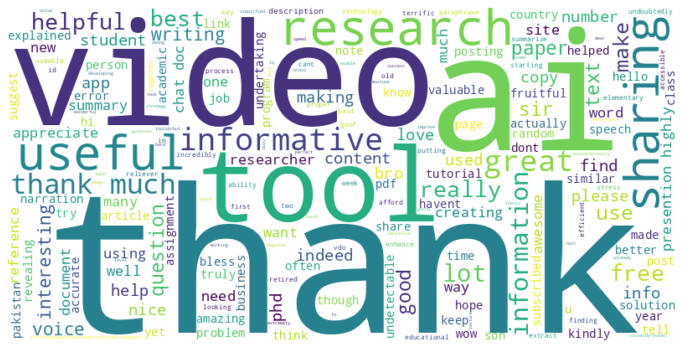

top 10 most frequent words
thank: 1.0000
ai: 0.6441
video: 0.5085
tool: 0.3051
research: 0.2712
useful: 0.2542
sharing: 0.2542
informative: 0.2203
great: 0.2034
thank much: 0.2034


In [ ]:
from wordcloud import WordCloud

video = df_comments['video_id'].iloc[97]

comments = get_comments_from_video(df_comments, video)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)

# Print wordcloud graph
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extract top 10 most frequent words and frequency
word_frequencies = wordcloud.words_
top_10_words = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:10]

print(f'top 10 most frequent words')
for word, freq in top_10_words:
    print(f"{word}: {freq:.4f}")

Merge dataframe with clean comments and clean transcriptions

In [ ]:
# Create new dataframe
df_content = df_transcript.copy()
if 'Unnamed: 0' in df_content.keys():
    df_content.drop(columns='Unnamed: 0', inplace=True)

# Get unique video_ids
video_id_list = list(set(df_comments[df_comments['language'] == 'en']['video_id']))

# Get all coments from video id in a dataframe
df_wordcloud = []
for id in video_id_list:
    word_list = {
        'video_id': id,
        'comment_list': get_comments_from_video(df_comments, id)
    }
    df_wordcloud.append(word_list)
df_wordcloud = pd.DataFrame(df_wordcloud)

# Merge both dataframes to get Content dataframe
df_content = df_content.merge(df_wordcloud, on='video_id', how='left')
df_content.head()

,video_id,original_language,transcription,language,clean_text,comment_list
0,qtlUwwtvuEg,English (auto-generated),[Music] thank you hello everyone I hope you ar...,english,music thank hello everyone hope great era ai w...,thank well explained video tutorial\n useful t...
1,QaoDXYYtgK0,English (auto-generated),number three [Music] Facebook has enacted an e...,english,number three music facebook enacted emergency ...,quotthey invented code languagequot man thats ...
2,PqDwddEHswU,English (auto-generated),in this series we're going to introduce deep l...,english,series going introduce deep learning least per...,brian douglas hero\n learned far sitting couch...
3,B-Y7rnOa43w,English (auto-generated),this is how to earn money with AI and it's par...,english,earn money ai part two let go want create kind...,oh im going try
4,vyit-1zKsZ4,English (auto-generated),when current Medical Science has run out of op...,english,current medical science run option doctor dont...,locked syndrome lateral amyloid multiple scler...


Export Content dataframe (comments and transcripts merged)

In [ ]:
df_content.to_csv('../data/clean_data/df_content.csv', index=False)

# Translate Comments to English

Text(0.5, 1.0, 'Videos with n_comments')

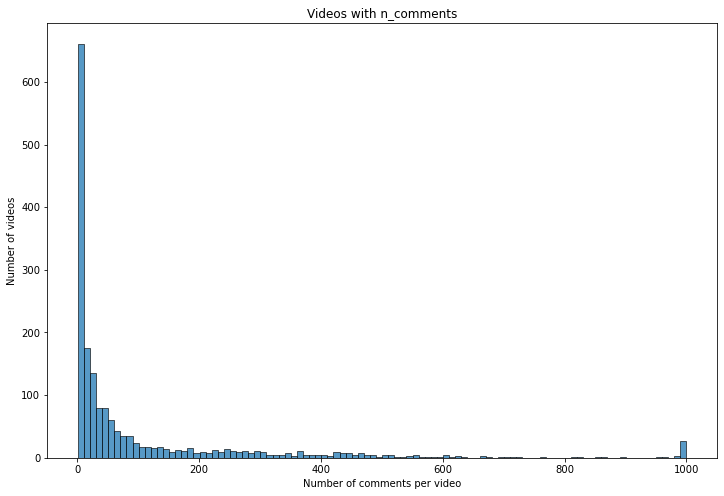

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df_comments['video_id'].value_counts(), bins=100, kde=False)
plt.xlabel('Number of comments per video')
plt.ylabel('Number of videos')
plt.title('Videos with n_comments')

In [ ]:
from langdetect import detect, DetectorFactory, LangDetectException
from nltk.corpus import stopwords

# Create a column with language detected
def detect_language(text):
    try:
        # Verificar si el texto es lo suficientemente largo
        if len(text.strip()) == 0:
            return None
        # Intentar detectar el idioma
        language = detect(text)
        return language
    except LangDetectException:
        # Si el texto es demasiado corto o no se puede detectar el idioma, devolver None
        return None

In [ ]:
# df_comments['language'] = df_comments['text'].apply(detect_language)

In [ ]:
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

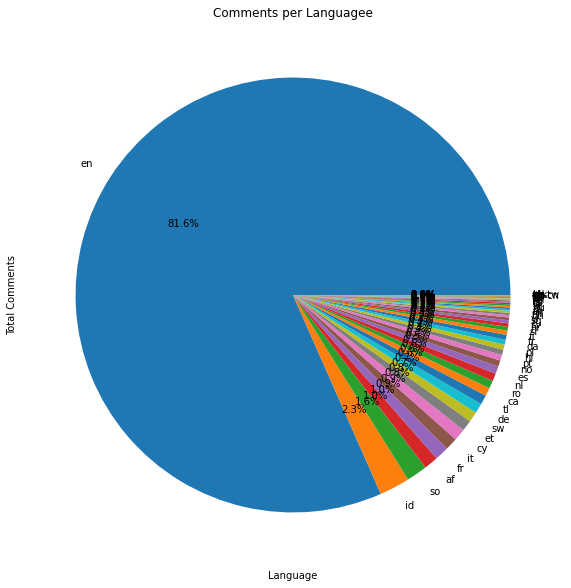

In [ ]:
plt.figure(figsize=(20,10))
df_comments['language'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Language')
plt.ylabel('Total Comments')
plt.title('Comments per Languagee')
plt.show();

# Translate all non-english comments to english

In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text, target_language='en'):
    translator = GoogleTranslator(source='auto', target=target_language)
    return translator.translate(text)

In [ ]:
# Translate non-english comments to english
# df_comments['translation'] = df_comments[df_comments['language'] != 'en']['text'].apply(translate_text)

In [ ]:
df_comments[df_comments['language'] != 'en']['text'].iloc[:10].apply(translate_text)

0       great video,helpful.
10                   Awesome
11      ultimate information
15            important one.
20       very fruitful video
22                 Excellent
24                     great
27                   amazing
29    Alhamdulillah. perfect
31            highly amazing
Name: text, dtype: object

# Sentiment Analysis Comments using VADER

* neg: Proporción del texto que es negativa.
* neu: Proporción del texto que es neutral.
* pos: Proporción del texto que es positiva.
* compound: Puntaje general que va de -1 (muy negativo) a 1 (muy positivo)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

text = "I love this product! It's absolutely fantastic and works like a charm."

# Realizar el análisis de sentimiento
sentiment = analyzer.polarity_scores(text)

# Mostrar el resultado
print(sentiment)

{'neg': 0.0, 'neu': 0.371, 'pos': 0.629, 'compound': 0.9272}


In [ ]:
def get_sentiment(text, model):
    if type(text) != type('string'):
        return None
    sentiment = model.polarity_scores(text)
    return sentiment['compound']

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analysis only to English comments and create a new 'sentiment' column
df['sentiment'] = df.apply(lambda row: get_sentiment(row['clean_text'], analyzer), axis=1)

df.to_parquet('/content/df_trans_sent_comments.parquet', index=False)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analysis only to English comments and create a new 'sentiment' column
df_content['sentiment'] = df_content.apply(lambda row: get_sentiment(row['comment_list'], analyzer) if row['language'] == 'english' else None, axis=1)

# Display the resulting DataFrame
print(df_content[['comment_list', 'sentiment']])

                                           comment_list  sentiment
0     thank well explained video tutorial\n useful t...     1.0000
1     quotthey invented code languagequot man thats ...     1.0000
2     brian douglas hero\n learned far sitting couch...     0.9972
3                                       oh im going try     0.0000
4     locked syndrome lateral amyloid multiple scler...     0.9994
...                                                 ...        ...
1782  third qampa video series mit professor josh an...     0.8252
1783  thanks excellent introduction subject really a...     0.9990
1784                                                NaN        NaN
1785  good thing politician going get right finish d...     0.9988
1786                                                NaN        NaN

[1787 rows x 2 columns]


In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df_content['sentiment'], bins=50)
plt.show();

NameError: name 'df_content' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
df_content.to_csv('../data/clean_data/df_content.csv', index=False)

# Numerical Metrics

In [294]:
# Load the data
df_comments = pd.read_parquet('../data/clean_data/df_trans_sent_comments.parquet')
df_videos = pd.read_csv('../data/clean_data/df_video_data.csv')

In [295]:
df_numerical = df_videos.copy()

Feature engineering for `df_comments`and `df_videos`:
* Comment Age

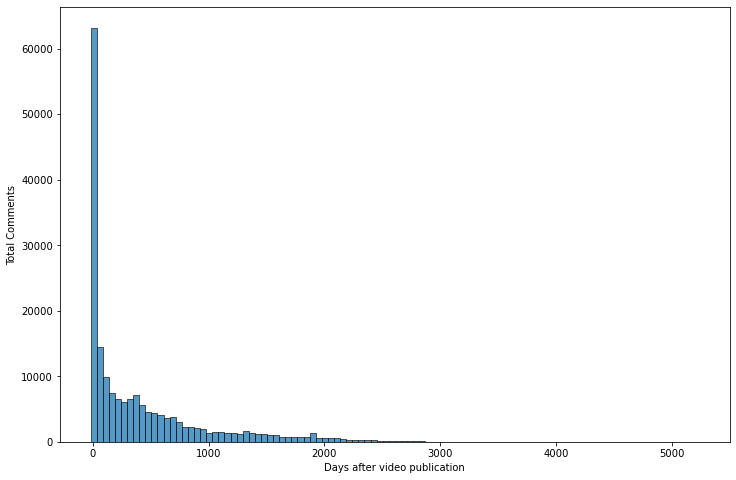

In [296]:
# Match name of column
df_videos.rename(columns={'videoId': 'video_id'}, inplace=True)
df_videos['publishedAt'] = pd.to_datetime(df_videos['publishedAt'])

# Merge both dataframes
df_merged = df_comments.merge(df_videos, on='video_id', how='left')

# Calculate comment's age
df_merged['comment_age_days'] = (df_merged['published_at'] - df_merged['publishedAt']).dt.days

# Plot the result
plt.figure(figsize=(12,8))
sns.histplot(df_merged['comment_age_days'], bins=100)
plt.ylabel('Total Comments')
plt.xlabel('Days after video publication')
plt.show();

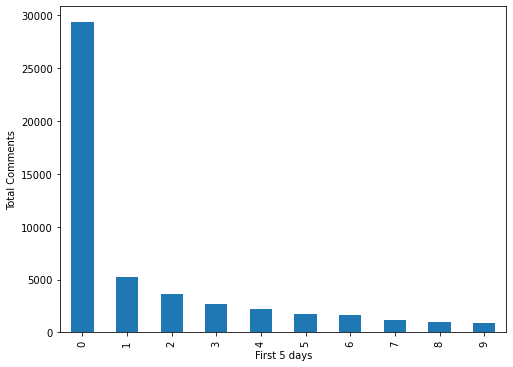

In [297]:
# Plot comments interaction firts days
plt.figure(figsize=(8, 6))
df_merged['comment_age_days'].value_counts()[:10].plot(kind='bar')
plt.xlabel('First 5 days')
plt.ylabel('Total Comments')
plt.show();

* Interation frequency

In [298]:
df_merged['likes_per_day'] = df_merged['like_count'] / df_merged['comment_age_days'].replace(0, 1)

In [299]:
len(df_merged[df_merged['comment_age_days'] < 0])

336

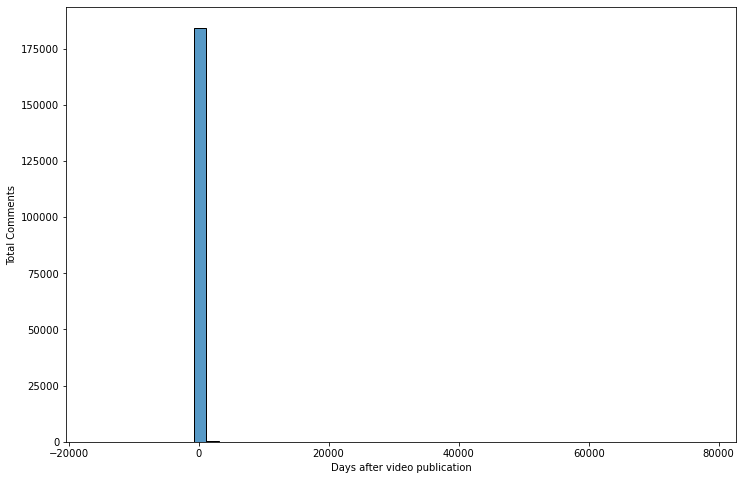

In [300]:
# Plot the result
plt.figure(figsize=(12,8))
sns.histplot(df_merged['likes_per_day'], bins=50)
plt.ylabel('Total Comments')
plt.xlabel('Days after video publication')
plt.show();

* Date Age

In [301]:
# Date age in days
df_videos['video_age_days'] = (datetime.now() - df_videos['publishedAt'].dt.tz_localize(None)).dt.days

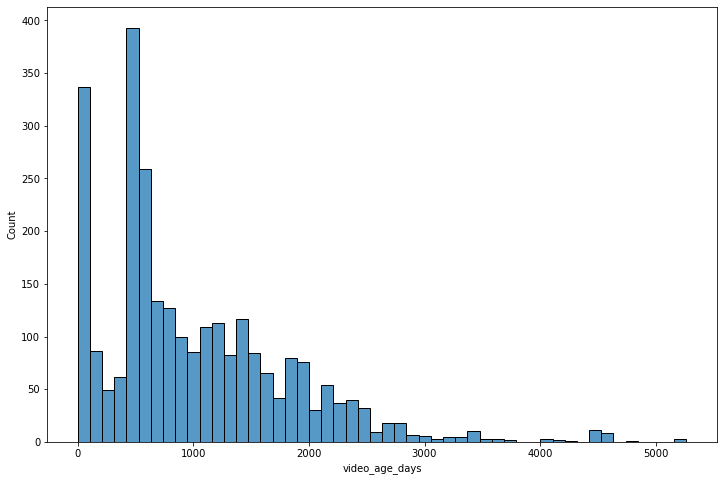

In [302]:
plt.figure(figsize=(12,8))
sns.histplot(df_videos['video_age_days'], bins=50)
plt.show();

* Weighted Sentiment Analysis

$$
\text{sentiment\_media\_video} = \frac{\sum_{i=1}^{n} \left(\text{sentiment\_comment}_i \times (\text{n\_likes\_per\_comment}_i + 1)\right)}{\text{n\_comments} + \text{n\_likes\_total}}
$$

In [303]:
# Calculate sentiment_score * likes
df_merged['likes_x_sentiment'] = df_merged['like_count'] * df_merged['sentiment'] + 1

# Sum of (sentiment_score * likes) per video
df_likes_comments_sum = df_merged.groupby('video_id')['likes_x_sentiment'].sum().reset_index()
df_n_comments = df_merged.groupby('video_id')['comment_id'].agg(total_comments = 'count').reset_index()
df_n_likes = df_merged.groupby('video_id')['like_count'].agg(total_comments_likes = 'sum').reset_index()
df_n_reply = df_merged.groupby('video_id')['totalReplyCount'].agg(total_reply_count = 'sum').reset_index()

In [304]:
df_videos = df_videos.merge(df_likes_comments_sum, on='video_id', how='left')
df_videos = df_videos.merge(df_n_comments, on='video_id', how='left')
df_videos = df_videos.merge(df_n_likes, on='video_id', how='left')
df_videos = df_videos.merge(df_n_reply, on='video_id', how='left')

df_videos['weighted_sentiment'] = df_videos['likes_x_sentiment'] / (df_videos['total_comments'] + df_videos['total_comments_likes'])

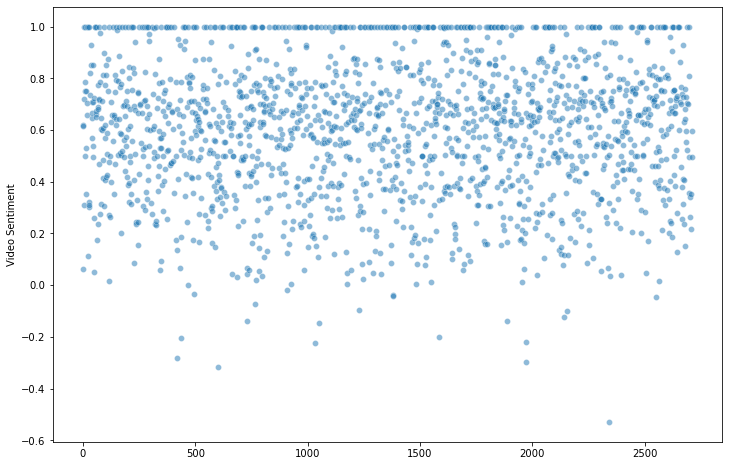

In [305]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_videos['weighted_sentiment'], alpha=0.5)
plt.ylabel('Video Sentiment')
plt.show();

In [306]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              2711 non-null   object             
 1   title                 2711 non-null   object             
 2   channelId             2711 non-null   object             
 3   description           2535 non-null   object             
 4   publishedAt           2711 non-null   datetime64[ns, UTC]
 5   thumbnail_url         2711 non-null   object             
 6   tags                  2711 non-null   object             
 7   categoryId            2711 non-null   int64              
 8   viewCount             2711 non-null   int64              
 9   likeCount             2711 non-null   int64              
 10  commentCount          2711 non-null   int64              
 11  licensed              2711 non-null   bool               
 12  durati

Nummerical columns from `df_videos`

In [307]:
# List of nummerical relevant columns
nummerical_columns = ['categoryId',
                      'viewCount', 
                      'likeCount', 
                      'commentCount',
                      'replyCount', 
                      'licensed', 
                      'duration', 
                      'video_age_days', 
                      'weighted_sentiment']

df_videos[nummerical_columns].iloc[:5]

KeyError: "['replyCount'] not in index"